In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=[10,5]

In [2]:
import pandas as pd

# Define the base path for the dataset
base_path = r'D:\final project\Dataset'

# List of dataset filenames and their corresponding variable names
datasets = {
    'olist_customers': 'olist_customers_dataset.csv',
    'olist_geolocation': 'olist_geolocation_dataset.csv',
    'olist_order_items': 'olist_order_items_dataset.csv',
    'olist_order_payments': 'olist_order_payments_dataset.csv',
    'olist_order_reviews': 'olist_order_reviews_dataset.csv',
    'olist_orders': 'olist_orders_dataset.csv',
    'olist_products': 'olist_products_dataset.csv',
    'olist_sellers': 'olist_sellers_dataset.csv',
    'product_category_name': 'product_category_name_translation.csv',
    'olist_marketing_qualified_leads':'olist_marketing_qualified_leads_dataset.csv',
    'olist_closed_deals': 'olist_closed_deals_dataset.csv'

}

# Read all datasets into variables
dataframes = {name: pd.read_csv(f'{base_path}\\{filename}') for name, filename in datasets.items()}

# Access individual DataFrames as needed
olist_customers = dataframes['olist_customers']
olist_geolocation = dataframes['olist_geolocation']
olist_order_items = dataframes['olist_order_items']
olist_order_payments = dataframes['olist_order_payments']
olist_order_reviews = dataframes['olist_order_reviews']
olist_orders = dataframes['olist_orders']
olist_products = dataframes['olist_products']
olist_sellers = dataframes['olist_sellers']
product_category_name = dataframes['product_category_name']
olist_marketing_qualified_leads = dataframes['olist_marketing_qualified_leads']
olist_closed_deals = dataframes['olist_closed_deals']



--Review data clean --

In [3]:
print('Review cols: ' , dataframes['olist_order_reviews'].columns.values)

# the review_comment_title column is 88% NaN so i'll just drop it. 
# TODO: nans for reviews just means there are none (?). 
# So maybe just assume that's all there is and use the data separately for a etxt analysis (in M3) ENDTODO

# and when the review was sent to the customer
review_drop_cols = ['review_comment_title']

Review cols:  ['review_id' 'order_id' 'review_score' 'review_comment_title'
 'review_comment_message' 'review_creation_date' 'review_answer_timestamp']


In [4]:
dataframes['olist_order_reviews']['review_comment_message'] = dataframes['olist_order_reviews']['review_comment_message'].fillna('No comment')
dataframes['olist_order_reviews']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,No comment,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,No comment,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,No comment,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99995,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,No comment,2017-12-09 00:00:00,2017-12-11 20:06:42
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99997,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,No comment,2018-07-01 00:00:00,2018-07-02 12:59:13
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,NaN,Solicitei a compra de uma capa de retrovisor c...,2017-12-15 00:00:00,2017-12-16 01:29:43


In [5]:
dataframes['olist_order_reviews'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_comment_title     11715 non-null   object
 4   review_comment_message   100000 non-null  object
 5   review_creation_date     100000 non-null  object
 6   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [7]:
from googletrans import Translator
def translate_text(text):
    if pd.isnull(text) or text.lower() == "nan":
        return text
    else:
        translator = Translator()
        try:
            translated = translator.translate(text, src='pt', dest='en')
            return translated.text
        except Exception as e:
            return None
        




In [11]:

import pandas as pd

# Load the reviews dataset into a DataFrame
file_path = r'D:\final project\Dataset\olist_order_reviews_dataset.csv'
review_df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print("First few rows of the reviews dataset:")
print(review_df.head(), "\n")

# Get the shape of the DataFrame (number of rows and columns)
print("Shape of the reviews dataset:")
print(review_df.shape, "\n")

# Check for missing values in the DataFrame
missing_values = review_df.isnull().sum()
print("Missing values in the reviews dataset:")
print(missing_values[missing_values > 0])  # Only display columns with missing values


First few rows of the reviews dataset:
                          review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                N

In [13]:
# Separate the review titles and comments, dropping NaN values in one go
review_data_title = review_df['review_comment_title'].dropna()
review_data = review_df.drop(columns=['review_comment_title']).dropna()

# Resetting the index for the review data
review_data.reset_index(drop=True, inplace=True)

# Displaying the shapes of the cleaned data
review_data_shape = review_data.shape
review_data_title_shape = review_data_title.shape

# Optional: Print the shapes for verification
print(f"Review Data Shape: {review_data_shape}")
print(f"Review Title Shape: {review_data_title_shape}")

Review Data Shape: (41753, 6)
Review Title Shape: (11715,)


In [25]:
import re
import nltk
from nltk.corpus import stopwords
import pandas as pd
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import pandas as pd
import google_trans_new
# Download necessary NLTK resources if not already downloaded
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

comments = []

def preprocess_review_comment(review_comment):
    """
    Preprocess a review comment by removing stopwords, non-letter characters, 
    tokenizing, and converting to lowercase.
    
    Args:
        review_comment (str): The review comment to preprocess.
    
    Returns:
        str: The preprocessed review comment.
    """
    # Check if the input is a valid string
    if not isinstance(review_comment, str):
        return ''  # Return empty string if input is not valid
    
    # Remove non-letter characters
    only_letters = re.sub("[^a-zA-Z]", " ", review_comment)
    
    # Tokenize the sentence
    tokens = nltk.word_tokenize(only_letters)
    
    # Convert to lowercase
    lower_case = [token.lower() for token in tokens]
    
    # Remove stopwords (using Portuguese stopwords)
    stop_words = set(stopwords.words('portuguese'))
    filtered_result = [token for token in lower_case if token not in stop_words]
    
    # Join the filtered tokens back into a string
    return ' '.join(filtered_result)


In [ ]:
# Initialize the translator once
translator = Translator()

def translate_text(text):
    """Translate a given text from Portuguese to English."""
    if pd.isnull(text) or text.lower() == "nan":
        return text
    try:
        translated = translator.translate(text, src='pt', dest='en')
        return translated.text
    except Exception as e:
        print(f"Error translating text: {e}")
        return None
    


In [30]:
import pandas as pd
from googletrans import Translator

# Initialize the translator once
translator = Translator()

def translate_text(text):
    """Translate a given text from Portuguese to English."""
    if pd.isnull(text) or text.lower() == "nan":
        return text
    try:
        translated = translator.translate(text, src='pt', dest='en')
        return translated.text
    except Exception as e:
        print(f"Error translating text: {e}")
        return None

def translate_csv(input_file, output_file):
    """Translate the contents of a CSV file and save to a new CSV file."""
    # Read the input CSV file
    df = pd.read_csv(input_file)
    
    # Print columns for debugging
    print("Columns in input CSV:", df.columns.tolist())
    
    # Check if 'review_comment_message' column exists (adjust based on your actual column name)
    if 'review_comment_message' not in df.columns:
        raise ValueError("Input CSV must contain a 'review_comment_message' column for translation.")
    
    # Translate each text entry in the specified column
    df['translated_text'] = df['review_comment_message'].apply(translate_text)
    
    # Save the results to the output CSV file
    df.to_csv(output_file, index=False)
    print(f"Translations saved to {output_file}")

# Usage
input_file_path = r'D:\final project\Dataset\olist_order_reviews_dataset.csv'  # Path to your input CSV file
output_file_path = 'all_translate_order.csv'  # Output CSV file name

translate_csv(input_file_path, output_file_path)

Columns in input CSV: ['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']
Error translating text: 'Translator' object has no attribute 'raise_Exception'
Error translating text: 'Translator' object has no attribute 'raise_Exception'
Error translating text: 'Translator' object has no attribute 'raise_Exception'
Error translating text: 'Translator' object has no attribute 'raise_Exception'
Error translating text: 'Translator' object has no attribute 'raise_Exception'
Error translating text: 'Translator' object has no attribute 'raise_Exception'
Error translating text: 'Translator' object has no attribute 'raise_Exception'
Error translating text: 'Translator' object has no attribute 'raise_Exception'
Error translating text: 'Translator' object has no attribute 'raise_Exception'
Error translating text: 'Translator' object has no attribute 'raise_Exception'
Error translating text: 'Translator' object h

KeyboardInterrupt: 

: 

translate test 001 

In [42]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import RSLPStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from googletrans import Translator
from afinn import Afinn
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt
from textblob import TextBlob
import nltk
import re
import time

STOP_WORDS= stopwords.words('portuguese')
STOP_WORDS_ENG = stopwords.words('english')

In [48]:
import pandas as pd

# Load the data
df = pd.read_csv(r'D:\final project\Dataset\olist_order_reviews_dataset.csv')

df.head(50)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,NaN,NaN,2018-08-14 00:00:00,2018-08-14 21:36:06
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,NaN,NaN,2017-05-17 00:00:00,2017-05-18 12:05:37
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47


In [47]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

df.review_comment_message = df.review_comment_message.apply(lambda text: remove_emoji(str(text)))
df.head(50)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,nan,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,nan,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,nan,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,nan,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,nan,2017-07-16 00:00:00,2017-07-18 19:30:34
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,NaN,nan,2018-08-14 00:00:00,2018-08-14 21:36:06
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,NaN,nan,2017-05-17 00:00:00,2017-05-18 12:05:37
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47


In [9]:
def translate_to_english(text):
    if not pd.isna(text):
        text= " ".join([word for word in word_tokenize(text) if word not in STOP_WORDS])
        translator = Translator()
        t_text = translator.translate(text, src= 'pt', dest= 'en').text
        return t_text
    else :
        return np.NaN

In [ ]:
import pandas as pd
import time

# Assuming df is already defined and contains the 'review_comment_message' column
# Define your translation function (replace with your actual translation function)
def translate_to_english(text):
    # Placeholder for your translation logic
    return text  # Replace this with actual translation logic

# Constants for chunk processing
CHUNK_SIZE = 250
LIMIT = 1000

# Initialize indices for chunk processing
lower = 0
upper = CHUNK_SIZE

while lower < len(df) and upper <= LIMIT:
    # Ensure that upper does not exceed the DataFrame length
    upper = min(upper, len(df))

    # Apply translation in chunks
    df.loc[lower:upper - 1, 'review_engreview_comment_message'] = df.review_comment_message.iloc[lower:upper].apply(translate_to_english)
    
    print('Completed:', upper)
    
    # Update indices for the next chunk
    lower = upper
    upper += CHUNK_SIZE
    
    # Sleep for 5 minutes (300 seconds) after each chunk processing
    time.sleep(300)

# Handle any remaining rows after the loop
if lower < len(df):
    df.loc[lower:, 'review_engreview_comment_message'] = df.review_comment_message.iloc[lower:].apply(translate_to_english)

# Output the DataFrame to a CSV file
output_file = "translated_review.csv"
df.to_csv(output_file, index=False)
print(f"Extracted to CSV, translation complete.")
print("Translation completed for all reviews.")

Completed: 250
Completed: 500
Completed: 750
Completed: 1000
Extracted to CSV, translation complete.
Translation completed for all reviews.


In [12]:
import numpy as np


# Filter the DataFrame for non-null English reviews and select relevant columns
eng_reviews = df.loc[df['review_engreview_comment_message'].notna(), ['review_id', 'review_comment_message', 'review_score']]

In [15]:
import re
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Ensure NLTK stopwords are downloaded
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Define a set of English stop words
STOP_WORDS_ENG = set(stopwords.words('english'))

def clean_text(text):
    """Remove non-word characters and convert to lowercase."""
    return re.sub(r'\W+', ' ', text).lower()

def remove_stop_words(words):
    """Remove stop words from the list of words."""
    return [word for word in words if word not in STOP_WORDS_ENG]

def preprocess_text(text):
    """Complete preprocessing pipeline for the input text."""
    cleaned_text = clean_text(text)
    words = word_tokenize(cleaned_text)
    filtered_words = remove_stop_words(words)
    return " ".join(filtered_words)

def preprocess_reviews(reviews):
    """Apply preprocessing to the DataFrame column."""
    return reviews['review_comment_message'].apply(preprocess_text)

# Assuming eng_reviews is a DataFrame already defined
eng_reviews['review_comment_message'] = preprocess_reviews(eng_reviews)

# Display a sample of the processed reviews
print(eng_reviews.sample(5))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\User/nltk_data'
    - 'c:\\Users\\User\\Desktop\\JDE 11 python file\\myEnv\\nltk_data'
    - 'c:\\Users\\User\\Desktop\\JDE 11 python file\\myEnv\\share\\nltk_data'
    - 'c:\\Users\\User\\Desktop\\JDE 11 python file\\myEnv\\lib\\nltk_data'
    - 'C:\\Users\\User\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [17]:
import csv
import requests
from bs4 import BeautifulSoup
import time

def translate_text(text, source_lang='auto', target_lang='en'):
    # URL for Google Translate with parameters for source and target languages
    url = f'https://translate.google.com/m?sl={source_lang}&tl={target_lang}&q={text}'
    response = requests.get(url)
    
    # Check if the request was successful
    if response.status_code != 200:
        print(f"Error fetching translation: {response.status_code}")
        return text  # Return the original text if there's an error
    
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find the translated text in the HTML structure
    translated_text = soup.find('div', class_='result-container')
    
    if translated_text:
        return translated_text.text.strip()  # Return the translated text
    else:
        print("Translation not found.")
        return text  # Return the original text if translation fails

def translate_csv(input_file, output_file, source_lang='auto', target_lang='en'):
    with open(input_file, 'r', newline='', encoding='utf-8') as infile, \
         open(output_file, 'w', newline='', encoding='utf-8') as outfile:
        
        reader = csv.reader(infile)
        writer = csv.writer(outfile)
        
        header = next(reader)
        writer.writerow(header)  # Write the header without translation
        
        for row in reader:
            translated_row = []
            for cell in row:
                translated_cell = translate_text(cell, source_lang, target_lang)
                translated_row.append(translated_cell)
                time.sleep(1)  # Add a delay to avoid overwhelming the server
            writer.writerow(translated_row)
            print(f"Translated row: {translated_row}")

# Usage
input_file = r'D:\final project\Dataset\olist_order_reviews_dataset.csv'
output_file = 'translated4.csv'  # Replace with your desired output CSV file name
source_language = 'auto'  # Or specify the source language code
target_language = 'en'  # Replace with the target language code

translate_csv(input_file, output_file, source_language, target_language)

Translated row: ['7bc2406110b926393aa56f80a40eba40', '73fc7af87114b39712e6da79b0a377eb', '4', '', '', '2018-01-18 00:00:00', '2018-01-18 21:46:59']
Translated row: ['80e641a11e56f04c1ad469d5645fdfde', 'a548910a1c6147796b98fdf73dbeba33', '5', '', '', '2018-03-10 00:00:00', '2018-03-11 03:05:13']
Translated row: ['228ce5500dc1d8e020d8d1322874b6f0', 'f9e4b658b201a9f2ecdecbb34bed034b', '5', '', '', '2018-02-17 00:00:00', '2018-02-18 14:36:24']
Translated row: ['e64fb393e7b32834bb789ff8bb30750e', '658677c97b385a9be170737859d3511b', '5', '', 'I received it well before the stipulated deadline.', '2017-04-21 00:00:00', '2017-04-21 22:02:06']
Translated row: ['f7c4243c7fe1938f181bec41a392bdeb', '8e6bfb81e283fa7e4f11123a3fb894f1', '5', '', "Congratulations Lannister Stores, I loved buying online, it's safe and practical. Congratulations to everyone, happy Easter.", '2018-03-01 00:00:00', '2018-03-02 10:26:53']
Translated row: ['15197aa66ff4d0650b5434f1b46cda19', 'b18dcdf73be66366873cd26c5724d1dc

ConnectionError: HTTPSConnectionPool(host='translate.google.com', port=443): Max retries exceeded with url: /m?sl=auto&tl=en&q=bc387658d6437dd9ddca220029690080 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x0000027CB1E2A9D0>: Failed to resolve 'translate.google.com' ([Errno 11001] getaddrinfo failed)"))

-------delivery ---------------------


In [18]:
df1=pd.merge(left=olist_orders,right=olist_order_payments,how='inner',on='order_id')
df1.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,3,179.12


In [19]:
df2=pd.merge(left=df1,right=olist_customers,how='inner',on='customer_id')
df2.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,1,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,3,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


In [21]:
df3=pd.merge(left=df2,right=olist_order_reviews,how='inner',on='order_id')
df3.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,...,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,...,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,...,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,...,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,...,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,No comment,2018-08-18 00:00:00,2018-08-22 19:07:58


In [22]:
df4=pd.merge(left=df3,right=olist_order_items,how='inner',on='order_id')
df4.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,...,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,...,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,...,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,...,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,...,NaN,No comment,2018-08-18 00:00:00,2018-08-22 19:07:58,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22


In [23]:
df5=pd.merge(left=df4,right=olist_products,how='inner',on='product_id')
df5.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,...,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,...,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0


In [24]:
df6=pd.merge(left=df5,right=olist_sellers,how='inner',on='seller_id')
df6.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,...,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,...,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840,guariba,SP


In [25]:
df=df6
print(df.isnull().sum())

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    15
order_delivered_carrier_date       1254
order_delivered_customer_date      2588
order_estimated_delivery_date         0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
review_id                             0
review_score                          0
review_comment_title             104226
review_comment_message                0
review_creation_date                  0
review_answer_timestamp               0
order_item_id                         0
product_id                            0
seller_id                             0


In [26]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,...,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,...,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840,guariba,SP


In [27]:
df['product_weight_g'].fillna(df['product_weight_g'].mean(), inplace=True)
df['product_length_cm'].fillna(df['product_length_cm'].mean(), inplace=True)
df['product_height_cm'].fillna(df['product_height_cm'].mean(), inplace=True)
df['product_width_cm'].fillna(df['product_width_cm'].mean(), inplace=True)

In [28]:
duplicates = df.duplicated()
print(duplicates.sum())
print(df.isnull().sum())

0
order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    15
order_delivered_carrier_date       1254
order_delivered_customer_date      2588
order_estimated_delivery_date         0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
review_id                             0
review_score                          0
review_comment_title             104226
review_comment_message                0
review_creation_date                  0
review_answer_timestamp               0
order_item_id                         0
product_id                            0
seller_id                             

In [29]:
df.describe()

,payment_sequential,payment_installments,payment_value,customer_zip_code_prefix,review_score,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix
count,118315.000000,118315.000000,118315.000000,118315.000000,118315.000000,118315.000000,118315.000000,118315.000000,116606.000000,116606.000000,116606.000000,118315.000000,118315.000000,118315.000000,118315.000000,118315.000000
mean,1.094062,2.943498,172.575651,35051.681579,4.014554,1.196509,120.651027,20.033024,48.767782,785.944008,2.205144,2112.331011,30.265227,16.620009,23.075075,24440.790703
std,0.728555,2.778022,267.104661,29824.811223,1.400186,0.699452,184.109626,15.836523,10.033375,652.578636,1.717429,3786.397791,16.187670,13.452804,11.748318,27571.679456
min,1.000000,0.000000,0.000000,1003.000000,1.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1001.000000
25%,1.000000,1.000000,60.850000,11310.000000,3.000000,1.000000,39.900000,13.080000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,6429.000000
50%,1.000000,2.000000,108.200000,24310.000000,5.000000,1.000000,74.900000,16.280000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,13660.000000
75%,1.000000,4.000000,189.260000,58640.000000,5.000000,1.000000,134.900000,21.180000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,27946.500000
max,29.000000,24.000000,13664.080000,99990.000000,5.000000,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99730.000000


In [30]:
date_cols=['order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date','review_answer_timestamp','shipping_limit_date','review_creation_date']
for i in date_cols:
    df[i]=pd.to_datetime(df[i])
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,credit_card,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3,voucher,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2,voucher,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,boleto,...,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,credit_card,...,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840,guariba,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118310,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1,credit_card,...,52.0,828.0,4.0,4950.0,40.0,10.0,40.0,17602,tupa,SP
118311,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1,credit_card,...,51.0,500.0,2.0,13300.0,32.0,90.0,22.0,8290,sao paulo,SP
118312,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1,credit_card,...,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,37175,ilicinea,MG
118313,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1,credit_card,...,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,37175,ilicinea,MG


In [31]:
df=df.drop(['customer_zip_code_prefix','seller_zip_code_prefix'],axis=1)
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,credit_card,...,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3,voucher,...,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2,voucher,...,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,boleto,...,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,credit_card,...,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,guariba,SP


-----Order status and cancellation analysis------------

In [32]:
print(df['order_status'].unique())

['delivered' 'invoiced' 'shipped' 'processing' 'canceled' 'unavailable'
 'approved']


In [33]:
order_status_count= df['order_status'].value_counts()
print(order_status_count)

order_status
delivered      115728
shipped          1255
canceled          570
invoiced          376
processing        376
unavailable         7
approved            3
Name: count, dtype: int64


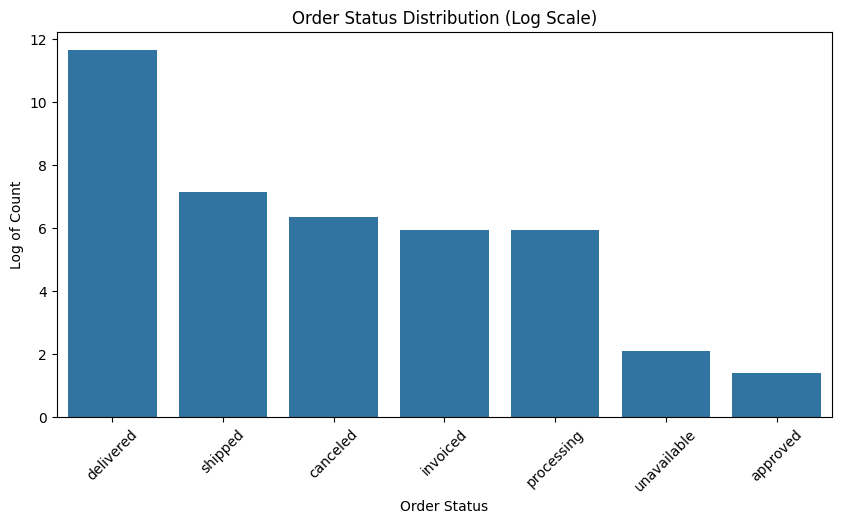

In [34]:
# scaling each category using log scale
import numpy as np
sns.barplot(x=order_status_count.index, y=np.log1p(order_status_count.values))
plt.title('Order Status Distribution (Log Scale)')
plt.xlabel('Order Status')
plt.ylabel('Log of Count')
plt.xticks(rotation=45)
plt.show()

(570, 37)
Cancellation Rate: 0.48%


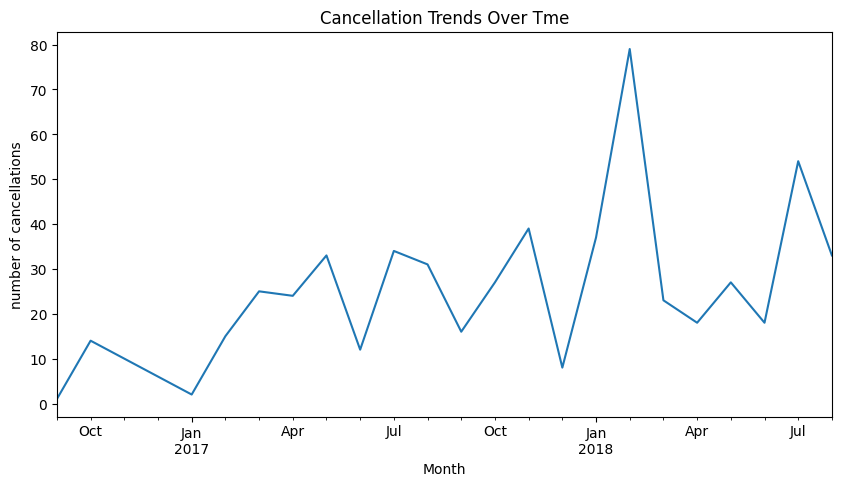

In [36]:
cancel_orders= df[df['order_status']=='canceled']
total_orders= len(df)
canceled_order_count=len(cancel_orders)
cancellation_rate=(canceled_order_count/total_orders)*100
print(cancel_orders.shape)
print(f"Cancellation Rate: {cancellation_rate:.2f}%")
#Cancellation by Date
cancellation_by_month=cancel_orders.groupby(cancel_orders['order_purchase_timestamp'].dt.to_period('M')).size()
cancellation_by_month.plot(kind='line', title='Cancellation Trends Over Tme')
plt.xlabel('Month')
plt.ylabel('number of cancellations')
plt.show()

Review affin test (positive/negative/neutral)

In [15]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import RSLPStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from googletrans import Translator
from afinn import Afinn
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt
from textblob import TextBlob
import nltk
import re


df= pd.read_csv(r'D:\final project\Dataset\olist_order_reviews_dataset - data cleanversion.csv', index_col=0)
# df['review_eng'] = ""
df.head(5)

,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_title_eng,review_eng
review_id,,,,,,,,
7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,NaN,NaN
80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,NaN,NaN
228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,NaN,NaN
e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,NaN,I received it well before the stipulated deadl...
f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,NaN,Congratulations lannister stores I loved shopp...


In [16]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

df.review_comment_message = df.review_comment_message.apply(lambda text: remove_emoji(str(text)))
df.head(10)

,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_title_eng,review_eng
review_id,,,,,,,,
7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,nan,2018-01-18 00:00:00,2018-01-18 21:46:59,NaN,NaN
80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,nan,2018-03-10 00:00:00,2018-03-11 03:05:13,NaN,NaN
228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,nan,2018-02-17 00:00:00,2018-02-18 14:36:24,NaN,NaN
e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,NaN,I received it well before the stipulated deadl...
f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,NaN,Congratulations lannister stores I loved shopp...
15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,nan,2018-04-13 00:00:00,2018-04-16 00:39:37,NaN,NaN
07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,nan,2017-07-16 00:00:00,2017-07-18 19:30:34,NaN,NaN
7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,NaN,nan,2018-08-14 00:00:00,2018-08-14 21:36:06,NaN,NaN
a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,NaN,nan,2017-05-17 00:00:00,2017-05-18 12:05:37,NaN,NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 7bc2406110b926393aa56f80a40eba40 to efe49f1d6f951dd88b51e6ccd4cc548f
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   order_id                 100000 non-null  object
 1   review_score             100000 non-null  int64 
 2   review_comment_title     11713 non-null   object
 3   review_comment_message   100000 non-null  object
 4   review_creation_date     100000 non-null  object
 5   review_answer_timestamp  100000 non-null  object
 6   review_title_eng         11711 non-null   object
 7   review_eng               41742 non-null   object
dtypes: int64(1), object(7)
memory usage: 6.9+ MB


In [18]:
df.review_eng.replace('nan',np.nan, inplace= True)
eng_reviews = df.dropna(subset= ['review_eng'])
eng_reviews = eng_reviews[['order_id', 'review_eng', 'review_score']]

C:\Users\User\AppData\Local\Temp\ipykernel_26012\388161990.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.review_eng.replace('nan',np.nan, inplace= True)


In [19]:
import nltk

# Download the Punkt tokenizer models
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:

# Set the NLTK data directory
nltk.data.path.append('C:\\nltk_data')  # Change this path if necessary

print(eng_reviews.head())  # Check the first few rows of the DataFrame
print(eng_reviews.columns)  # Check column names

                                                          order_id  \
review_id                                                            
e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
8670d52e15e00043ae7de4c01cc2fe06  b9bf720beb4ab3728760088589c62129   
4b49719c8a200003f700d3d986ea1a19  9d6f15f95d01e79bd1349cc208361f09   
3948b09f7c818e2d86c9a546758b2335  e51478e7e277a83743b6f9991dbfa3fb   

                                                                         review_eng  \
review_id                                                                             
e64fb393e7b32834bb789ff8bb30750e  I received it well before the stipulated deadl...   
f7c4243c7fe1938f181bec41a392bdeb  Congratulations lannister stores I loved shopp...   
8670d52e15e00043ae7de4c01cc2fe06  efficient device. On the website the brand of ...   
4b49719c8a200003f700d3d986ea1a19    But a little slow...for the price, it'

In [20]:
import re
import pandas as pd
from nltk.tokenize import word_tokenize
import nltk

# Download the Punkt tokenizer models if you haven't done so
nltk.download('punkt')

# Optionally set the NLTK data path if necessary
nltk.data.path.append('C:\\nltk_data')  # Adjust this path as needed

STOP_WORDS_ENG = set(["a", "the", "and", "is", "in", "it", "to"])  # Add more stop words as needed

def preprocess_text(text: str) -> str:
    """Preprocess the input text by removing non-word characters, converting to lowercase,
    tokenizing, and removing stop words."""
    if pd.isna(text):  # Check for NaN values
        return ""
    
    # Remove non-word characters and convert to lowercase
    text = re.sub(r'\W+', ' ', text).lower()
    
    # Tokenize the text and filter out stop words
    words = word_tokenize(text)
    filtered_words = [word for word in words if word not in STOP_WORDS_ENG]
    
    return " ".join(filtered_words)

# Display a sample of the processed reviews
print(eng_reviews.sample(5))

                                                          order_id  \
review_id                                                            
745d611023f00ddfaa444e01ebcc9d3c  40177473ba36616817cf3e1c3a0643ed   
aa39d019eae9aeb2280688327b44bcd2  1c64a95702ee730080852e28d43a73e6   
23c5d00bf5f7b4e17a40c37158e9e3a3  ded0d9b3df9ac8d6ea99bc2f88762481   
1c234b4b90a3572281922d0a5e834697  ed74b2249d7641a1a372251783b088d5   
94213f1db5417565148101250153734a  4b42a606687e048a7a33669b84bf8690   

                                                                         review_eng  \
review_id                                                                             
745d611023f00ddfaa444e01ebcc9d3c  Use I received it before the deadline\nThis ti...   
aa39d019eae9aeb2280688327b44bcd2  My son loved it! It will definitely use litera...   
23c5d00bf5f7b4e17a40c37158e9e3a3  I always like to buy from Lannister even thoug...   
1c234b4b90a3572281922d0a5e834697  I received the product ten days ahead of

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
af = Afinn()

score_afinn = eng_reviews.review_eng.apply(
    lambda text: af.score(text)
)

sentiment_afinn = score_afinn.apply(
    lambda s: 'positive' if s > 0 else 'negative' if s < 0 else 'neutral'
)

afinn_reviews = pd.concat([eng_reviews.order_id, score_afinn, sentiment_afinn], axis=1)
afinn_reviews.columns= ['product_id', 'score', 'sentiment']
afinn_reviews.sample(5)

df= afinn_reviews
df.to_csv('review_sentiment.csv', index=False)

In [11]:
review_sentiments = afinn_reviews.groupby('product_id').agg({
    'score':'mean',
    'sentiment':pd.Series.mode
})

review_sentiments = review_sentiments.sort_values('score', ascending= False)
review_sentiments[:20]

,score,sentiment
product_id,,
961e941567157246b67c0c448fb7252e,26.0,positive
dba6fefb7f441ba6ec433320366d3037,23.0,positive
dac16a931a09274638e939d74d5a9097,22.0,positive
17e8b55480433d174982a3eea0454a8b,22.0,positive
e662f080948818831b03ae9386ddab42,21.0,positive
e6717b6671df1d58c3f2435ec49eb74a,20.0,positive
866c3d690461371bdd01676cccd0dfa3,19.0,positive
f1d6d7277ac0980ac1b522e9502d87c9,19.0,positive
d01376995a52b231a198a5f484b20841,19.0,positive


(np.float64(-0.5), np.float64(1199.5), np.float64(799.5), np.float64(-0.5))

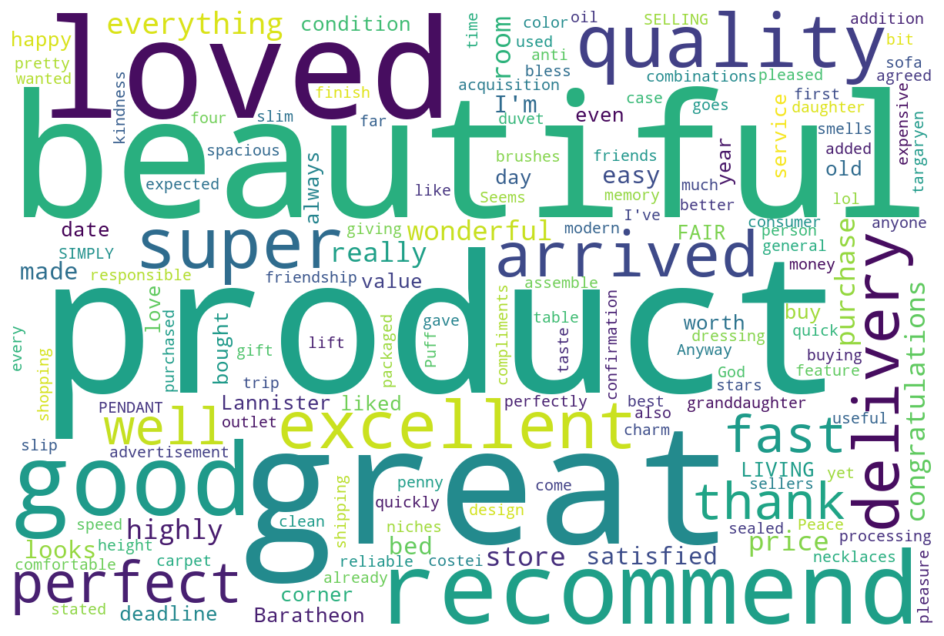

In [12]:
def get_all_text(t):
    global text
    text = text+t+" "

text = ""

tmp = eng_reviews[eng_reviews.order_id.isin(review_sentiments.index[:20])]
tmp.review_eng.apply(get_all_text)

wordcloud = WordCloud(
    width= 1200,
    height= 800,
    stopwords= STOP_WORDS_ENG,
    background_color= 'white'
).generate(text)

plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')

In [66]:
review_sentiments[-20:]

,score,sentiment
product_id,,
4f11c536ca6b0a28ea1c7583d6a5df63,-10.0,negative
6b37f541eb6753f5383147a84d419d11,-10.0,negative
7fece9c7487cb93f6d37df78e2283d07,-10.0,negative
3a4d49c9ef72a561be7ce1df8d7493d0,-10.0,negative
a01074d070fb607d7e92d6a4a13de47a,-10.0,negative
19ba831bc3128a65996fed4c4c4823ee,-10.0,negative
a7ff25f0e4f6914216004204460f5797,-10.0,negative
6225dae3fcc1416785f294cc07f2e4db,-10.0,negative
dd5831f3eb10afa80b5cea07ae84e87e,-10.0,negative


(np.float64(-0.5), np.float64(1199.5), np.float64(799.5), np.float64(-0.5))

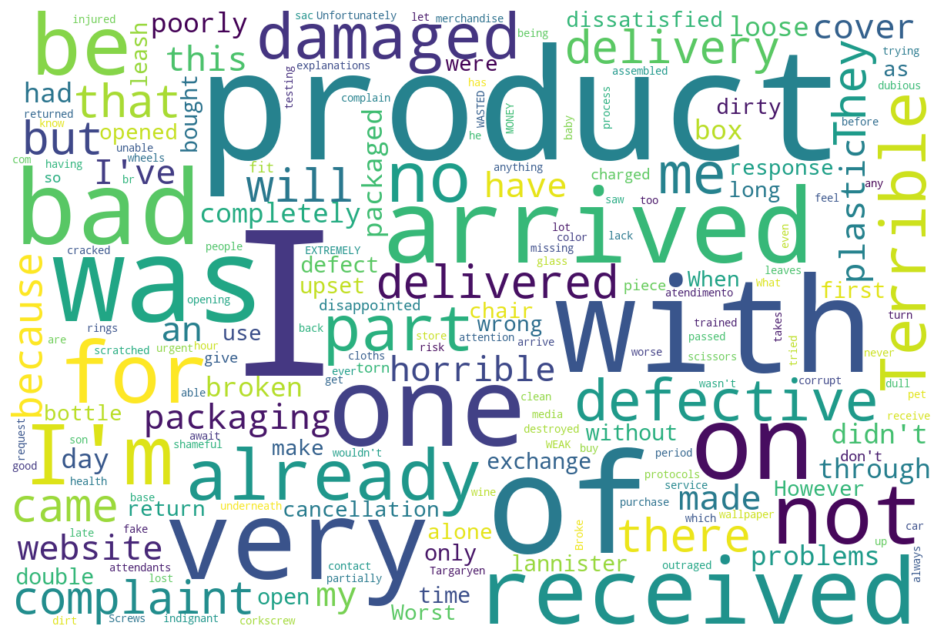

In [67]:
text = ""

tmp = eng_reviews[eng_reviews.order_id.isin(review_sentiments.index[-20:])]
tmp.review_eng.apply(get_all_text)

wordcloud = WordCloud(
    width= 1200,
    height= 800,
    stopwords= STOP_WORDS_ENG,
    background_color= 'white'
).generate(text)

plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')

In [23]:
scores = eng_reviews.review_eng.apply(
    lambda text: round(TextBlob(text).sentiment.polarity, 3) 
)

sentiments = scores.apply(
    lambda s: 'positive' if s > 0 else 'negative' if s < 0 else 'neutral'
)

textblob_reviews = pd.concat([eng_reviews.order_id, score_afinn, sentiment_afinn,eng_reviews.review_eng,eng_reviews.review_score ], axis=1)
textblob_reviews.columns= ['product_id', 'score', 'sentiment', 'reviews_eng', 'reviews_score']
textblob_reviews.sample(5)
textblob_reviews.to_csv('review_3.2.csv', index=False)

In [14]:
review_sentiments = textblob_reviews.groupby('product_id').agg({
    'score':'mean',
    'sentiment':pd.Series.mode
})

review_sentiments = review_sentiments.sort_values('score',ascending= False)
review_sentiments[:20]

,score,sentiment
product_id,,
961e941567157246b67c0c448fb7252e,26.0,positive
dba6fefb7f441ba6ec433320366d3037,23.0,positive
dac16a931a09274638e939d74d5a9097,22.0,positive
17e8b55480433d174982a3eea0454a8b,22.0,positive
e662f080948818831b03ae9386ddab42,21.0,positive
e6717b6671df1d58c3f2435ec49eb74a,20.0,positive
866c3d690461371bdd01676cccd0dfa3,19.0,positive
f1d6d7277ac0980ac1b522e9502d87c9,19.0,positive
d01376995a52b231a198a5f484b20841,19.0,positive


In [15]:
review_sentiments[-20:]

,score,sentiment
product_id,,
4f11c536ca6b0a28ea1c7583d6a5df63,-10.0,negative
6b37f541eb6753f5383147a84d419d11,-10.0,negative
7fece9c7487cb93f6d37df78e2283d07,-10.0,negative
3a4d49c9ef72a561be7ce1df8d7493d0,-10.0,negative
a01074d070fb607d7e92d6a4a13de47a,-10.0,negative
19ba831bc3128a65996fed4c4c4823ee,-10.0,negative
a7ff25f0e4f6914216004204460f5797,-10.0,negative
6225dae3fcc1416785f294cc07f2e4db,-10.0,negative
dd5831f3eb10afa80b5cea07ae84e87e,-10.0,negative


In [16]:
afinn_reviews 

,product_id,score,sentiment
review_id,,,
e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,0.0,neutral
f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,11.0,positive
8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,0.0,neutral
4b49719c8a200003f700d3d986ea1a19,9d6f15f95d01e79bd1349cc208361f09,3.0,positive
3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,2.0,positive
...,...,...,...
df5fae90e85354241d5d64a8955b2b09,509b86c65fe4e2ad5b96408cfef9755e,5.0,positive
a709d176f59bc3af77f4149c96bae357,d5cb12269711bd1eaf7eed8fd32a7c95,-1.0,negative
b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,8.0,positive


In [17]:
# Count occurrences of each sentiment value in the 'sentiment' column
sentiment_counts = afinn_reviews['sentiment'].value_counts()
# Count total number of entries in the 'sentiment' column
total_sentiment_count = afinn_reviews['sentiment'].count()

sentiment_counts

sentiment
positive    24073
neutral     11864
negative     5805
Name: count, dtype: int64

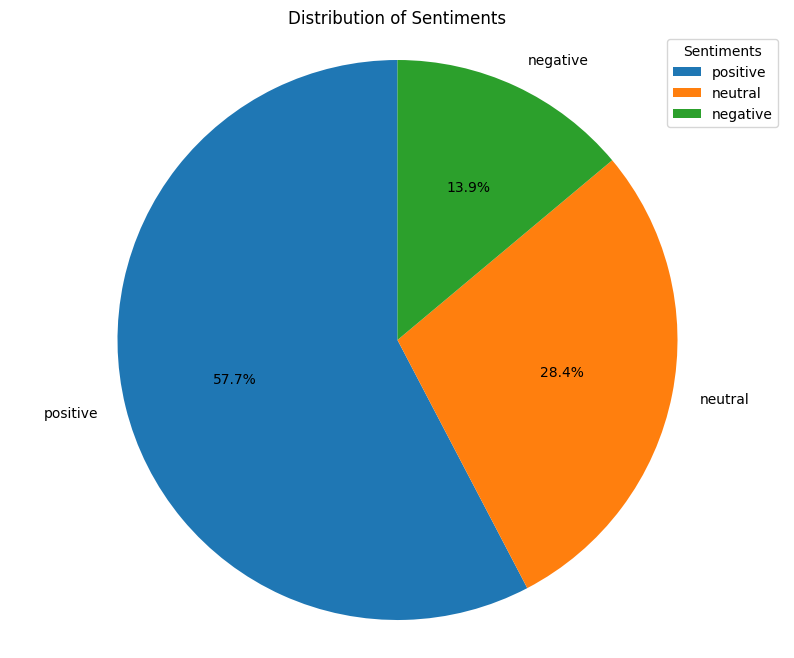

In [18]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Calculate percentages for each sentiment
sentiment_percentages = sentiment_counts / total_sentiment_count * 100

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(sentiment_percentages, labels=sentiment_percentages.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sentiments')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add a legend
plt.legend(title="Sentiments", loc="best")

# Show the plot
plt.show()


Deep data cleaning  and analysis

In [2]:
import numpy as np
import pandas as pd

import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns

import re

import warnings 
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", None)

In [3]:
import pandas as pd

# Define the base path for the dataset
base_path = r'D:\final project\Dataset'

# List of dataset filenames and their corresponding variable names
datasets = {
    'olist_customers': 'olist_customers_dataset.csv',
    'olist_geolocation': 'olist_geolocation_dataset.csv',
    'olist_order_items': 'olist_order_items_dataset.csv',
    'olist_order_payments': 'olist_order_payments_dataset.csv',
    'olist_order_reviews': 'olist_order_reviews_dataset.csv',
    'olist_orders': 'olist_orders_dataset.csv',
    'olist_products': 'olist_products_dataset.csv',
    'olist_sellers': 'olist_sellers_dataset.csv',
    'product_category_name': 'product_category_name_translation.csv',
    'olist_marketing_qualified_leads':'olist_marketing_qualified_leads_dataset.csv',
    'olist_closed_deals': 'olist_closed_deals_dataset.csv'

}

# Read all datasets into variables
dataframes = {name: pd.read_csv(f'{base_path}\\{filename}') for name, filename in datasets.items()}

# Access individual DataFrames as needed
olist_customers = dataframes['olist_customers']
olist_geolocation = dataframes['olist_geolocation']
olist_order_items = dataframes['olist_order_items']
olist_order_payments = dataframes['olist_order_payments']
olist_order_reviews = dataframes['olist_order_reviews']
olist_orders = dataframes['olist_orders']
olist_products = dataframes['olist_products']
olist_sellers = dataframes['olist_sellers']
product_category_name = dataframes['product_category_name']
olist_marketing_qualified_leads = dataframes['olist_marketing_qualified_leads']
olist_closed_deals = dataframes['olist_closed_deals']



In [4]:
print('Customers Data Shape:',olist_customers.shape)
display(olist_customers.head())

Customers Data Shape: (99441, 5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
print('Geolocation Data Shape:',olist_geolocation.shape)
display(olist_geolocation.head())

Geolocation Data Shape: (1000163, 5)


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [8]:
print('Order Items Data Shape:',olist_order_items.shape)
display(olist_order_items.head())

Order Items Data Shape: (112650, 7)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [9]:
print('Order Payments Data Shape:',olist_order_payments.shape)
display(olist_order_payments.head())

Order Payments Data Shape: (103886, 5)


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [10]:
print('Order Reviews Data Shape:',olist_order_reviews.shape)
display(olist_order_reviews.head())

Order Reviews Data Shape: (100000, 7)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [11]:
print('Orders Data Shape:',olist_orders.shape)
display(olist_orders.head())

Orders Data Shape: (99441, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [12]:
print('Orders Data Shape:',olist_products.shape)
display(olist_products.head())

Orders Data Shape: (32951, 9)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [13]:
print('Orders Data Shape:',olist_sellers.shape)
display(olist_sellers.head())

Orders Data Shape: (3095, 4)


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [14]:
product_category_name.head()
print('Product Category Data Shape:',product_category_name.shape)
display(product_category_name.head())

Product Category Data Shape: (71, 2)


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [15]:
print('Orders Data Shape:',olist_closed_deals.shape)
display(olist_closed_deals.head())

Orders Data Shape: (842, 14)


,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,NaN,NaN,NaN,reseller,NaN,0.0
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,food_drink,online_small,NaN,NaN,NaN,NaN,reseller,NaN,0.0
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,NaN,NaN,NaN,manufacturer,NaN,0.0


In [16]:
print('Orders Data Shape:',olist_marketing_qualified_leads.shape)
display(olist_marketing_qualified_leads.head())

Orders Data Shape: (8000, 4)


,mql_id,first_contact_date,landing_page_id,origin
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search


In [18]:
# Define a function to generate a summary DataFrame of data characteristics
def skimming_data(data):
    # Create a DataFrame 'skimmed_data' with columns to capture various data characteristics
    skimmed_data = pd.DataFrame({
        'feature': data.columns.values,  # Column names
        'data_type': data.dtypes.values,  # Data types of columns
        'null_value(%)': data.isna().mean().values * 100,  # Percentage of missing values
        'neg_value(%)': [len(data[col][data[col] < 0]) / len(data) * 100 if col in data.select_dtypes(include=[np.number]).columns else 0 for col in data.columns],  # Percentage of negative values for numeric columns
        '0_value(%)': [len(data[col][data[col] == 0]) / len(data) * 100 if col in data.select_dtypes(include=[np.number]).columns else 0 for col in data.columns],  # Percentage of zero values for numeric columns
        'duplicate': data.duplicated().sum(),  # Number of duplicated rows
        'n_unique': data.nunique().values,  # Number of unique values for each column
        'sample_unique': [data[col].unique() for col in data.columns]  # Sample unique values for each column
    })
    # Round the values in the summary DataFrame to 3 decimal places
    return skimmed_data.round(3)

# Filter invalid city names based on pattern
def filtered_city(data, col):
    pattern = re.compile("[^a-z\sA-Z0-9-\'+]")
    filtered_df = data[data[col].str.contains(pattern)]
    return filtered_df

Geolocation ();

In [22]:
skimming_data(olist_geolocation)

,feature,data_type,null_value(%),neg_value(%),0_value(%),duplicate,n_unique,sample_unique
0,geolocation_zip_code_prefix,int64,0.0,0.000,0.0,261831,19015,"[1037, 1046, 1041, 1035, 1012, 1047, 1013, 102..."
1,geolocation_lat,float64,0.0,99.866,0.0,261831,717360,"[-23.54562128115268, -23.54608112703553, -23.5..."
2,geolocation_lng,float64,0.0,100.000,0.0,261831,717613,"[-46.63929204800168, -46.64482029837157, -46.6..."
3,geolocation_city,object,0.0,0.000,0.0,261831,8011,"[sao paulo, são paulo, sao bernardo do campo, ..."
4,geolocation_state,object,0.0,0.000,0.0,261831,27,"[SP, RN, AC, RJ, ES, MG, BA, SE, PE, AL, PB, C..."


In [23]:
# Drop duplicates data
olist_geolocation.drop_duplicates(inplace=True)
olist_geolocation.duplicated().sum()

np.int64(0)

In [24]:
olist_geolocation['geolocation_city'].value_counts()

geolocation_city
sao paulo               79927
rio de janeiro          35177
são paulo               19718
belo horizonte          19474
curitiba                11263
                        ...  
banquete                    1
guaporanga                  1
...arraial do cabo          1
chapadão do lageado         1
são joão do itaperiú        1
Name: count, Length: 8011, dtype: int64

In [25]:
# function to replace non-standard special characters with standard characters in a string
def replace_char(city_name):
    city_name = re.sub(r'[ãââàáä]', 'a', city_name)
    city_name = re.sub(r'[íîì]', 'i', city_name)
    city_name = re.sub(r'[úûùü]', 'u', city_name)
    city_name = re.sub(r'[éêèë]', 'e', city_name)
    city_name = re.sub(r'[óõôòö]', 'o', city_name)
    city_name = re.sub(r'[ç]', 'c', city_name)
    return city_name

# Applying the function to clean 'geolocation_city' column
olist_geolocation['geolocation_city'] = olist_geolocation['geolocation_city'].apply(replace_char)

# Searching for city names that do not follow a pattern
filtered_city(olist_geolocation, 'geolocation_city')

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
106037,4728,-23.639872,-46.713571,sa£o paulo,SP
301807,13318,-23.293804,-45.959930,jacare (cabreuva),SP
302988,13318,-23.256983,-47.055205,jacare (cabreuva),SP
308945,13454,-22.734480,-47.380589,santa barbara d`oeste,SP
377210,17970,-21.269165,-51.668758,sao joao do pau d%26apos%3balho,SP
421038,21032,-22.857779,-43.252626,"rio de janeiro, rio de janeiro, brasil",RJ
491149,25970,-22.392335,-42.989392,´teresopolis,RJ
502643,27163,-22.467331,-43.829419,california da barra (barra do pirai),RJ
506885,27598,-22.411815,-44.553700,penedo (itatiaia),RJ
522746,28927,-22.622491,-42.004973,tamoios (cabo frio),RJ


In [26]:
# Check a sample zip code
olist_geolocation[olist_geolocation['geolocation_zip_code_prefix']==45936].head(15)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
694783,45936,-12.883913,-38.478122,itabatan,BA
694790,45936,-17.999945,-39.868270,itabata,BA
694792,45936,-12.903227,-38.308831,itabata,BA
694832,45936,-12.921871,-38.491053,itabatan,BA
694905,45936,-18.000329,-39.867793,itabata,BA
694910,45936,-12.807618,-38.395391,itabata,BA
694939,45936,-18.010597,-39.864476,itabata,BA
694996,45936,-18.006772,-39.863218,itabata,BA
695000,45936,-14.670199,-40.489571,itabata,BA
695014,45936,-12.921859,-38.441688,itabata,BA


In [28]:
# Cleaning all geolocation city
for i in olist_geolocation['geolocation_zip_code_prefix'].unique():
    mode_city = olist_geolocation[olist_geolocation['geolocation_zip_code_prefix'] == i]['geolocation_city'].mode().values[0]
    olist_geolocation.loc[olist_geolocation['geolocation_zip_code_prefix'] == i, 'geolocation_city'] = mode_city

# Convert the city name column to title case
olist_geolocation['geolocation_city'] = olist_geolocation['geolocation_city'].str.title()

# Searching for city names that do not follow a pattern
filtered_city(olist_geolocation, 'geolocation_city')

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state


In [30]:
olist_geolocation['geolocation_city'].value_counts()

geolocation_city
Sao Paulo                99650
Rio De Janeiro           35178
Belo Horizonte           19475
Curitiba                 11264
Brasilia                  9073
                         ...  
Boa Sorte                    1
Chiador                      1
Cataguarino                  1
Maresias                     1
Sao Manoel Do Guaiacu        1
Name: count, Length: 5771, dtype: int64

Customers Data 

In [31]:
# Calling the 'skimming_data' function to display an overview of the DataFrame
skimming_data(olist_customers)

,feature,data_type,null_value(%),neg_value(%),0_value(%),duplicate,n_unique,sample_unique
0,customer_id,object,0.0,0.0,0.0,0,99441,"[06b8999e2fba1a1fbc88172c00ba8bc7, 18955e83d33..."
1,customer_unique_id,object,0.0,0.0,0.0,0,96096,"[861eff4711a542e4b93843c6dd7febb0, 290c77bc529..."
2,customer_zip_code_prefix,int64,0.0,0.0,0.0,0,14994,"[14409, 9790, 1151, 8775, 13056, 89254, 4534, ..."
3,customer_city,object,0.0,0.0,0.0,0,4119,"[franca, sao bernardo do campo, sao paulo, mog..."
4,customer_state,object,0.0,0.0,0.0,0,27,"[SP, SC, MG, PR, RJ, RS, PA, GO, ES, BA, MA, M..."


In [32]:
# Merge df_cust with relevant columns from df_geolocation
olist_customers2= olist_customers.merge(olist_geolocation[['geolocation_zip_code_prefix', 'geolocation_city']].drop_duplicates(), 
                        left_on='customer_zip_code_prefix', 
                        right_on='geolocation_zip_code_prefix', 
                        how='left')

# Fill missing values in geolocation_city with customer_city title-cased
olist_customers2['geolocation_city'].fillna(olist_customers['customer_city'].str.title(), inplace=True)

# Update customer_city with geolocation_city value
olist_customers2['customer_city'] = olist_customers2['geolocation_city']

# Drop the unnecessary columns from the merged DataFrame
olist_customers2.drop(columns=['geolocation_zip_code_prefix', 'geolocation_city'], inplace=True)

# Display the first few rows of the updated DataFrame
olist_customers2.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Sao Bernardo Do Campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Sao Paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Mogi Das Cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Campinas,SP


In [33]:
olist_customers2['customer_city'].value_counts()

customer_city
Sao Paulo                  15540
Rio De Janeiro              6882
Belo Horizonte              2773
Brasilia                    2135
Curitiba                    1521
                           ...  
Campos Verdes                  1
Sao Nicolau                    1
Picarra                        1
Adhemar De Barros              1
Nova Esperanca Do Piria        1
Name: count, Length: 4089, dtype: int64

Order Items Data

In [34]:
# Calling the 'skimming_data' function to display an overview of the DataFrame
skimming_data(olist_order_items)

,feature,data_type,null_value(%),neg_value(%),0_value(%),duplicate,n_unique,sample_unique
0,order_id,object,0.0,0.0,0.00,0,98666,"[00010242fe8c5a6d1ba2dd792cb16214, 00018f77f2f..."
1,order_item_id,int64,0.0,0.0,0.00,0,21,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
2,product_id,object,0.0,0.0,0.00,0,32951,"[4244733e06e7ecb4970a6e2683c13e61, e5f2d52b802..."
3,seller_id,object,0.0,0.0,0.00,0,3095,"[48436dade18ac8b2bce089ec2a041202, dd7ddc04e1b..."
4,shipping_limit_date,object,0.0,0.0,0.00,0,93318,"[2017-09-19 09:45:35, 2017-05-03 11:05:13, 201..."
5,price,float64,0.0,0.0,0.00,0,5968,"[58.9, 239.9, 199.0, 12.99, 199.9, 21.9, 19.9,..."
6,freight_value,float64,0.0,0.0,0.34,0,6999,"[13.29, 19.93, 17.87, 12.79, 18.14, 12.69, 11...."


In [36]:
# Convert datetime datatype
olist_order_items['shipping_limit_date'] = pd.to_datetime(olist_order_items['shipping_limit_date'])
olist_orders.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [40]:
#Renaming the zip_code_prefix column to be the same across the three sheets
geolocation = olist_geolocation.rename(columns={"geolocation_zip_code_prefix": "zip_code_prefix"})
sellers = olist_sellers.rename(columns={"seller_zip_code_prefix": "zip_code_prefix"})
customers =olist_customers.rename(columns={"customer_zip_code_prefix": "zip_code_prefix"})


In [41]:
geolocation.head(10)

,zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,Sao Paulo,SP
1,1046,-23.546081,-46.644820,Sao Paulo,SP
2,1046,-23.546129,-46.642951,Sao Paulo,SP
3,1041,-23.544392,-46.639499,Sao Paulo,SP
4,1035,-23.541578,-46.641607,Sao Paulo,SP
5,1012,-23.547762,-46.635361,Sao Paulo,SP
6,1047,-23.546273,-46.641225,Sao Paulo,SP
7,1013,-23.546923,-46.634264,Sao Paulo,SP
8,1029,-23.543769,-46.634278,Sao Paulo,SP
9,1011,-23.547640,-46.636032,Sao Paulo,SP


In [2]:
import pandas as pd

# Load data from CSV file (ensure the path is correct)
try:
    df = pd.read_csv(r'D:\final project\Dataset\olist_orders_dataset.csv')
except FileNotFoundError:
    print("The specified file was not found.")
    exit()

# Check if required columns exist
if 'order_purchase_timestamp' not in df.columns or 'order_id' not in df.columns:
    print("Required columns are missing from the dataset.")
    exit()

# Convert purchase_timestamp to datetime
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'], errors='coerce')

# Check for any conversion issues
if df['order_purchase_timestamp'].isnull().any():
    print("There were issues converting purchase_timestamp to datetime.")
    exit()

# Extract day of the week and map to desired format
df['day_of_week'] = df['order_purchase_timestamp'].dt.dayofweek.map({
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
})

# Group by day_of_week and count order_id
result = df.groupby('day_of_week')['order_id'].count().reset_index(name='order_count')

# Sort by day_of_week (if needed)
result = result.sort_values(by='day_of_week')

print(result)

  day_of_week  order_count
0      Friday        14122
1      Monday        16196
2    Saturday        10887
3      Sunday        11960
4    Thursday        14761
5     Tuesday        15963
6   Wednesday        15552
